In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"
!pip install -U ucimlrepo
!pip install -U seaborn==0.9.0

In [1]:
from ucimlrepo import fetch_ucirepo
from datetime import datetime
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from scipy.special import boxcox1p, inv_boxcox
from scipy.stats import boxcox_normmax
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
from scipy import stats as stat
import numpy as np
import seaborn as sns

In [2]:
# fetch dataset 
data = pd.read_csv(r'C:\Users\Connor\Desktop\Heart.csv')

# data (as pandas dataframes) 
X = data.iloc[:, :-1]
y = data.iloc[:, 13:14]

In [3]:
# variable information 
data.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [4]:
#get statistics for the features
data.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0.01,35.0,0.0,0.0,100.0,149.00,0.0,0.00,95.02,0.0,0.0,0.0,0.0,1.0,0.0
0.25,47.5,0.0,0.0,120.0,211.00,0.0,0.00,133.50,0.0,0.0,1.0,0.0,2.0,0.0
0.50,55.0,1.0,1.0,130.0,240.00,0.0,1.00,153.00,0.0,0.8,1.0,0.0,2.0,1.0
0.75,61.0,1.0,2.0,140.0,274.50,0.0,1.00,166.00,1.0,1.6,2.0,1.0,3.0,1.0
0.99,71.0,1.0,3.0,180.0,406.74,1.0,1.98,191.96,1.0,4.2,2.0,4.0,3.0,1.0


In [5]:
#check features for null values
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [6]:
#check target for null values
y.isnull().sum()

target    0
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()

# data (as pandas dataframes) 
X = data.iloc[:, :-1]
y = data.iloc[:, 13:14]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
data_norm = data.copy()

y_norm = y

data_norm['chol'] = X['chol'] / X['chol'].max()
data_norm['trestbps'] = X['trestbps'] / X['trestbps'].max()
data_norm['thalach'] = X['thalach'] / X['thalach'].max()
data_norm['cp'] = X['cp'] / X['cp'].max()
data_norm['oldpeak'] = X['oldpeak'] / X['oldpeak'].max()
data_norm['slope'] = X['slope'] / X['slope'].max()
data_norm[["age"]] = X[["age"]].astype("int64")
data_norm['thal'] = data['thal'] / data['thal'].max()

X_norm = data_norm.iloc[:, :-1]
y_norm = data_norm.iloc[:, 13:14]

y_norm

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


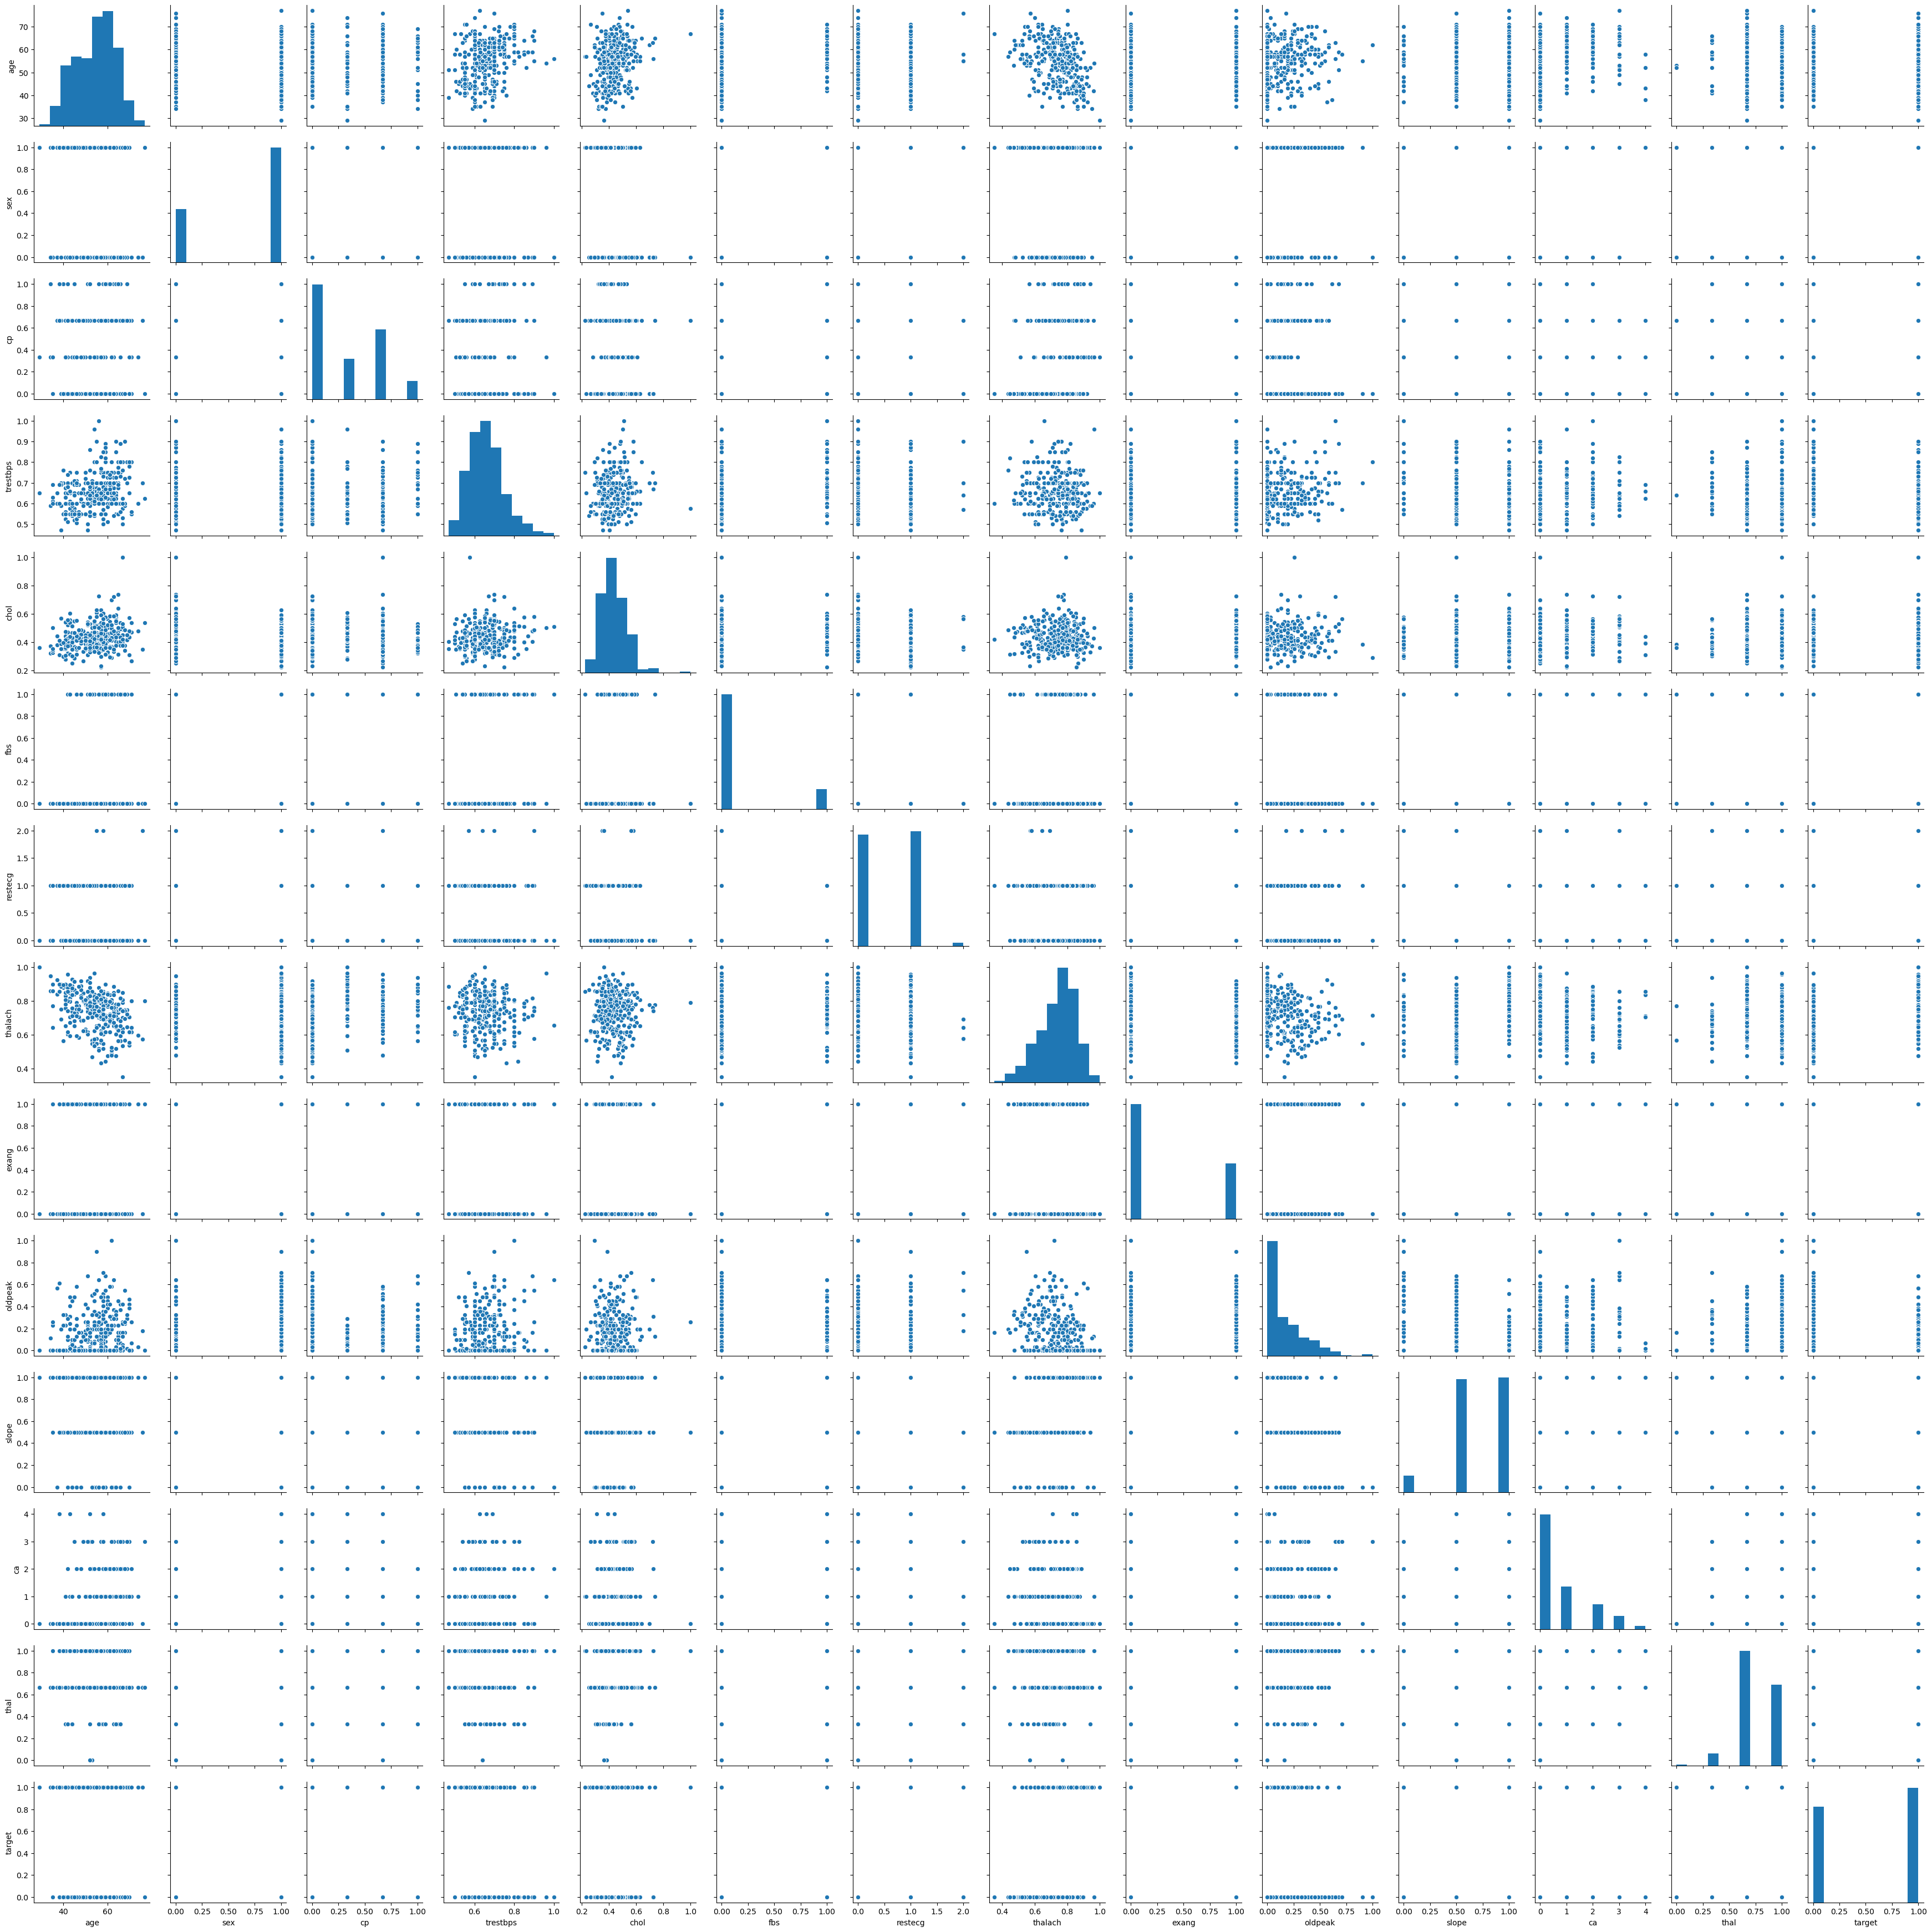

In [9]:
# May need to specify bandwidth (bw) in order to plot, else can delete the `, diag_kws={'bw': 0.2})` code.
sns.pairplot(data_norm)

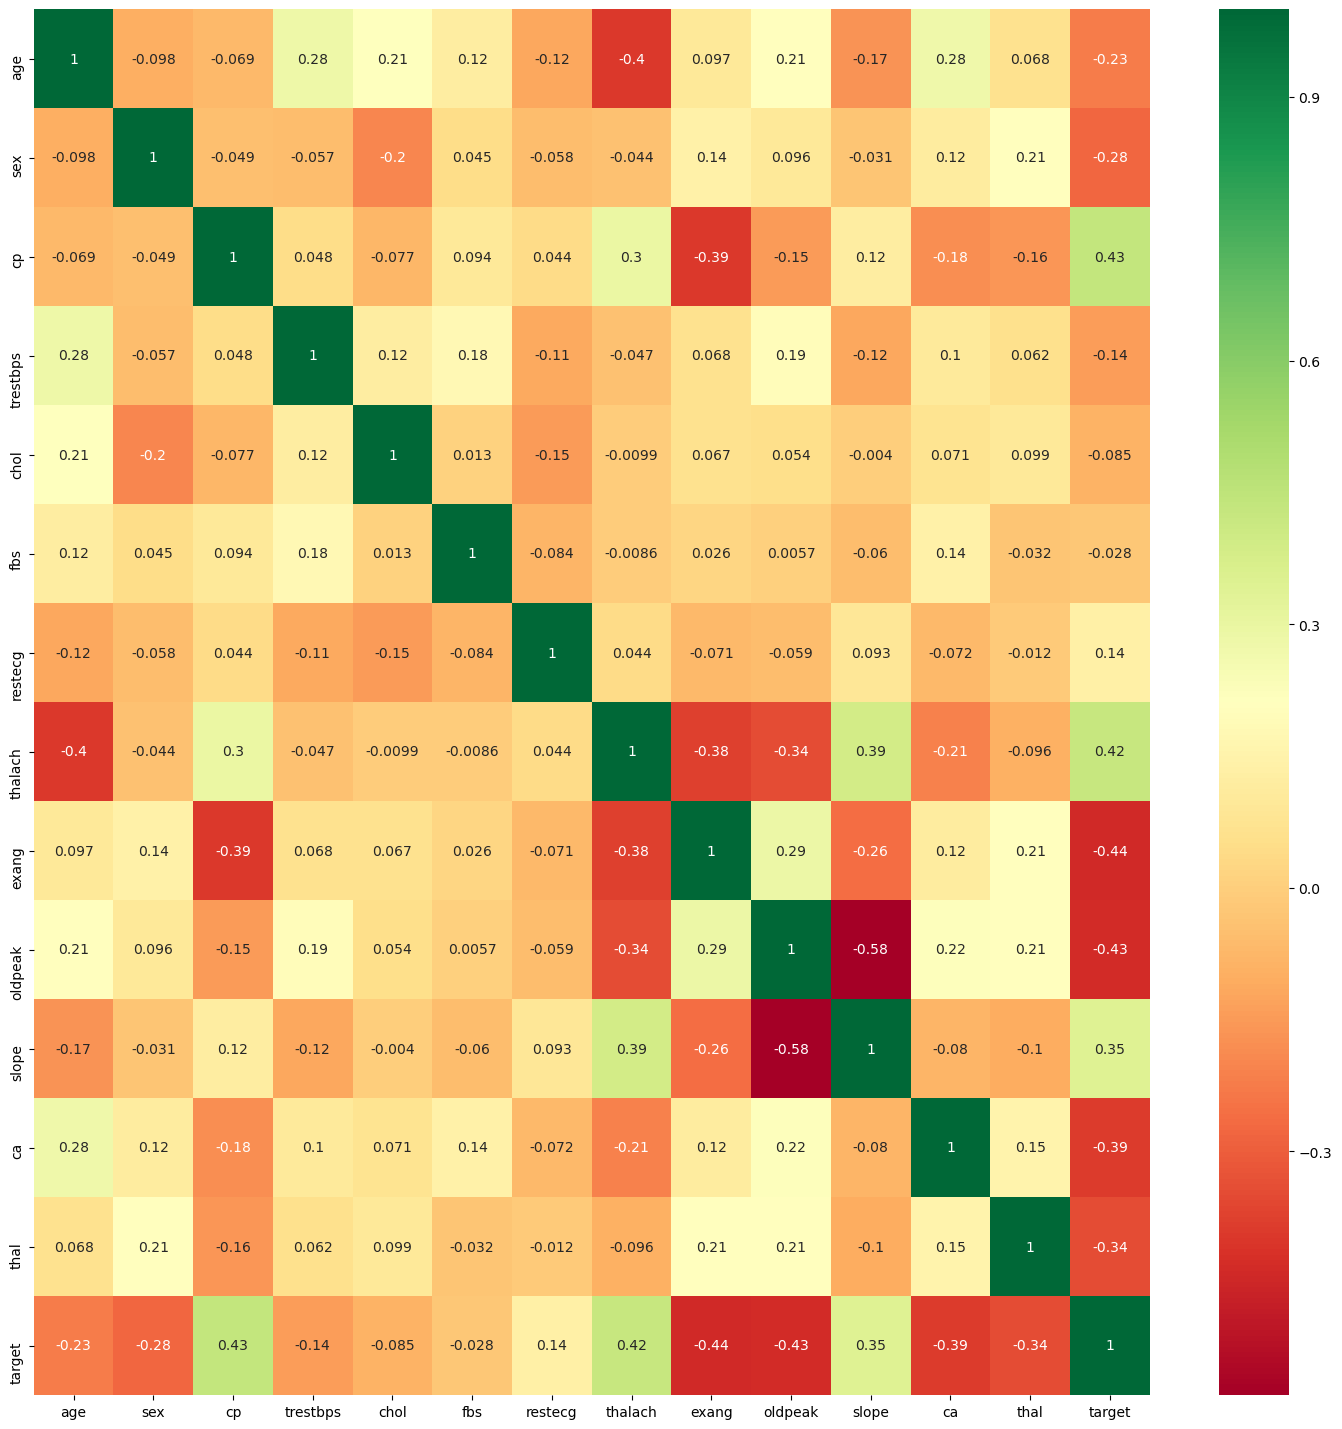

In [10]:
#plot the heatmap diagram wtih the given settings
plt.figure(figsize=(18,18))
sns.heatmap(data_norm.corr(),annot=True,cmap='RdYlGn')

#show the heatmap
plt.show()

In [11]:
lr = LinearRegression()

rs = 65

#define the polynomial features for the regression
pf = PolynomialFeatures(degree = 1, include_bias = False)

#fir the X data
X_pf = pf.fit_transform(X_norm)

#get the training and testing datasets
X_trainOne, X_testOne, y_trainOne, y_testOne = train_test_split(X_pf, y_norm, test_size = 0.2, random_state = rs)

#transform the training data
s = StandardScaler()
X_train_s = s.fit_transform(X_trainOne)

#fit the data
lr.fit(X_train_s, y_trainOne)

#transform the testing data
X_test_s = s.transform(X_testOne)

#predict the testing data using the linear regression model
y_pred_bc = lr.predict(X_test_s)

#obrain the R^2 score
r2_score(y_testOne, y_pred_bc)

0.7048177057965919

In [12]:
# also set a random state
rs = 19

# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y_norm), test_size = 0.2, stratify = np.ravel(y_norm), random_state = rs)

# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'newton-cg'
# Set the maximum number of iterations for the logistic regression model
max_iter = 60000

# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state = rs, penalty = penalty, multi_class = multi_class, solver = solver, max_iter = max_iter)

#fit the logistic regression model
l2_model.fit(X_train, y_train)

#predict the results of wine
l2_preds = l2_model.predict(X_test)

#obrain the R^2 score
r2_score(y_test, l2_preds)

0.8679653679653679

In [13]:
# also set a random state
rs = 14

# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y_norm), test_size = 0.2, stratify = np.ravel(y_norm), random_state = rs)

# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'elasticnet'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'saga'
# Set the maximum number of iterations for the logistic regression model
max_iter = 10000
# l1_ratio
l1_ratio = 0.1

# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state = rs, penalty = penalty, multi_class = multi_class, solver = solver, max_iter = max_iter, l1_ratio = l1_ratio)

#fit the logistic regression model
l2_model.fit(X_train, y_train)

#predict the results of wine
l2_preds = l2_model.predict(X_test)

#obrain the R^2 score
r2_score(y_test, l2_preds)

0.801948051948052

In [14]:
# also set a random state
rs = 265

# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y_norm), test_size = 0.1, stratify = np.ravel(y_norm), random_state = rs)

# The lasso regression model
lassor = Lasso(alpha=0.001)

lassor = lassor.fit(X_train, y_train)
Y_pred_lr = lassor.predict(X_test)

#obrain the R^2 score
r2_score(y_test, Y_pred_lr)

0.805797016228342

In [15]:
#set a random state
rs = 557

#get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y_norm), test_size = 0.2, random_state = rs)

#fit the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#initialize the model
classifier = SVC(kernel = 'linear', C = 0.3, random_state = rs)

#fit the data
classifier.fit(X_train, y_train)

#Predict
y_pred = classifier.predict(X_test)

#run prediction on the testing data
prediction = pd.DataFrame(y_pred)

#Accuracy
metrics.accuracy_score(y_test, prediction)

0.9672131147540983

In [16]:
#set a random state
rs = 72

#get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y_norm), test_size = 0.2, random_state = rs)

#fit the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Train Model  
neigh = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

#Prediction
prediction = neigh.predict(X_test)

#run prediction on the testing data
testingPrediction = pd.DataFrame(prediction)

#get the accuracy of the prediction
metrics.accuracy_score(y_test, testingPrediction)

C:\Users\connor\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9672131147540983

In [17]:
#set a random state
rs = 323
rsTwo = 999

#get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y_norm), test_size = 0.1, random_state = rs)

#initialize the model
HeartTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 7, min_weight_fraction_leaf = 0.001, random_state = rsTwo)

#Train Model 
HeartTree.fit(X_train, y_train)

#run prediction on the testing data
y_pred = HeartTree.predict(X_test)

#get the accuracy of the prediction
metrics.accuracy_score(y_test, y_pred)

1.0

In [18]:
#set the number of maximum features
max_features = round(np.sqrt(X.shape[1])) - 1

#set the number of estimators
n_estimators = 24

#set a random state
rs = 807

#get training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_norm, np.ravel(y_norm), test_size = 0.2, random_state = rs)

#initialize the model
model = RandomForestClassifier(max_features = max_features, n_estimators = n_estimators, random_state = rs)

#Train Model
model.fit(X_train, y_train)

#get the accuracy of the prediction
print(metrics.accuracy_score(y_test, model.predict(X_test)))

0.9508196721311475
